In [2]:
import sys
from os.path import abspath
sys.path.insert(0, abspath('..'))

from os.path import join

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np


import torch
from torchclust.data import load_data
from torchclust.modules import STC
from torchclust.metrics import SpacePlot, Evaluate
from torchclust.utils.cluster import SphericalKmeans

plot = SpacePlot()
eval = Evaluate()

>>>>> /home/godwin/Documents/academic/PPD/torchclust/demos
>>>>> data_loader.py cwd:  /home/godwin/Documents/academic/PPD/torchclust/demos


[nltk_data] Downloading package punkt to /home/godwin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/godwin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
cur = abspath("")
dataset = 'SearchSnippets'
data_in_dir=join(cur, "..", "datasets")
dataset_dir=join(data_in_dir, dataset)

In [4]:
checkpoint_dir=join(dataset_dir, 
                    "artefacts",
                    "STC-d384:500:500:2000:20-epoch30-datSearchSnippets-wdeHuggingFace-scaMinMax-tfeNone-norml2-initKmeans"
                    )

checkpoint = "STC-datSearchSnippets-wdeHuggingFace-scaMinMax-tfeNone-norml2-initKmeans.pth"
checkpoint_path = join(checkpoint_dir, checkpoint)
checkpoint_path

'/home/godwin/Documents/academic/PPD/torchclust/demos/../datasets/SearchSnippets/artefacts/STC-d384:500:500:2000:20-epoch30-datSearchSnippets-wdeHuggingFace-scaMinMax-tfeNone-norml2-initKmeans/STC-datSearchSnippets-wdeHuggingFace-scaMinMax-tfeNone-norml2-initKmeans.pth'

In [5]:
x, y = load_data(dataset=dataset_dir, word_emb='HuggingFace', transform=None, scaler='MinMax', norm='l2')
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(checkpoint_path)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

MinMax scaling completed...


(torch.Size([11106, 384]),
 torch.Size([1234, 384]),
 torch.Size([11106]),
 torch.Size([1234]))

In [6]:
z = stc.autoencoder.encoder(X_train)

In [7]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_hgf_mmx_ikm = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_km_pred))

avg_hgf_mmx_ikm = np.array(tmp)
np.round(avg_hgf_mmx_ikm.mean(axis=0), 3) * 100, avg_hgf_mmx_ikm.std(axis=0)

(array([72.6, 58. , 53.5]), array([0.00014697, 0.00020976, 0.00031875]))

In [8]:
# comprehension list with 5 runs of Sherical kmeans, get average and std of metrics
avg_hgf_mmx_iskm = []
tmp = []
for i in range(5):
    skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
    skmeans.fit(z.detach().numpy())
    y_skm_pred = skmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_skm_pred))

avg_hgf_mmx_iskm = np.array(tmp)
np.round(avg_hgf_mmx_iskm.mean(axis=0), 3) * 100, avg_hgf_mmx_iskm.std(axis=0)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 0
iteration: 1
it

(array([73. , 57.1, 51.7]), array([0.02404401, 0.00815436, 0.01750127]))

In [9]:
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z.detach().numpy())
y_km_pred = kmeans.labels_


skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
skmeans.fit(z.detach().numpy())
y_skm_pred = skmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration:

In [10]:
print(min(y_km_pred), len(np.unique(y_km_pred)), max(y_km_pred))
print(min(y_skm_pred), len(np.unique(y_skm_pred)), max(y_skm_pred))

0 8 7
0 8 7


In [11]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred)

[0.7265, 0.5803, 0.5355]

In [12]:
eval.allMetrics(y_train.detach().numpy(), y_skm_pred)

[0.7002, 0.5603, 0.4954]

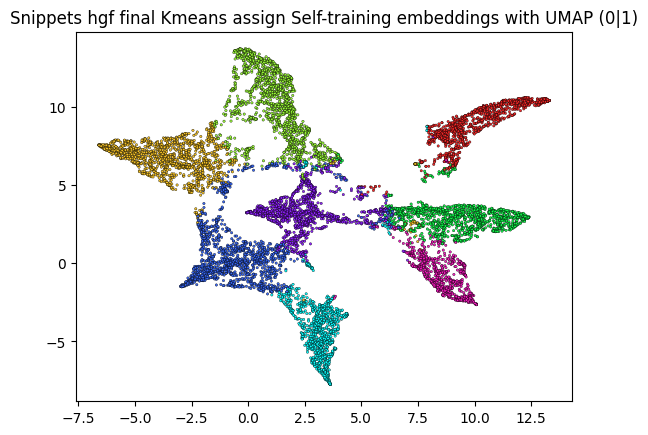

In [13]:
plot.commonSpace_plot(z.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred,
                      data_name="Snippets hgf final Kmeans assign", dimred = 'UMAP')

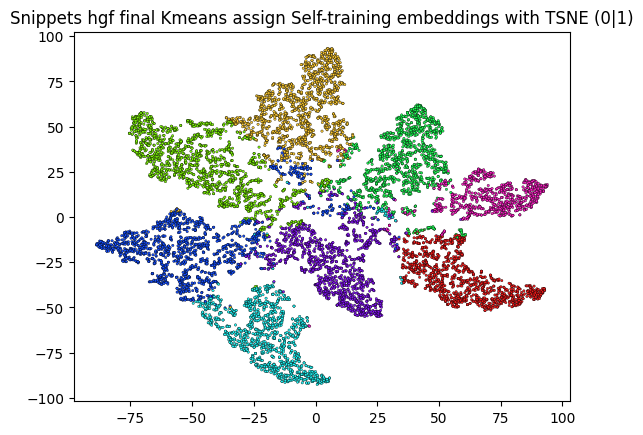

In [15]:
plot.commonSpace_plot(z.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred,
                      data_name="Snippets hgf final Kmeans assign", dimred = 'TSNE')

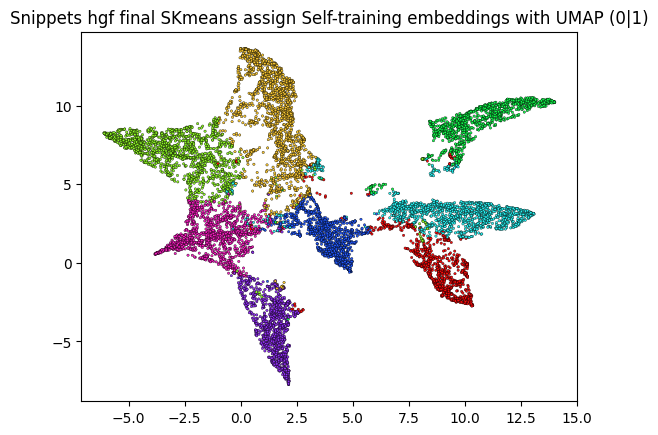

In [14]:
plot.commonSpace_plot(z.detach().numpy(), comp=[0, 1], tagLabels=y_skm_pred, 
                      data_name="Snippets hgf final SKmeans assign", dimred = 'UMAP')